**차원**

다차원 배열에서 차원은 배열의 축 개수를 말한다.

**차원  축소**

대표적인 알고리즘이 주성분 분석(PCA)이 있다.

원본 데이터의 분산을 나타내는 벡터를 주성분이라고 한다.

주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같다. 

주성분은 원본 차원과 같고 주성분으로 바꾼 데이터의 차원은 줄어든다.

In [1]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA가 찾은 주성분은 components_ 속성에 저장되어 있다.

In [3]:
print(pca.components_.shape)
# 50개의 주성분을 찾음, 원본 데이터의 특성 개수는 10000개임

(50, 10000)


원본 데이터와 차원이 같으므로 주성분을 100x100 크기의 이미지처럼 출력할 수 있음

In [4]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr) # 샘플 수
    rows = int(np.ceil(n/10)) #한 줄에 10개의 이미지
    cols = n if rows<2 else 10
    fig,axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j <n:
                axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i,j].axis('off')
    plt.show()

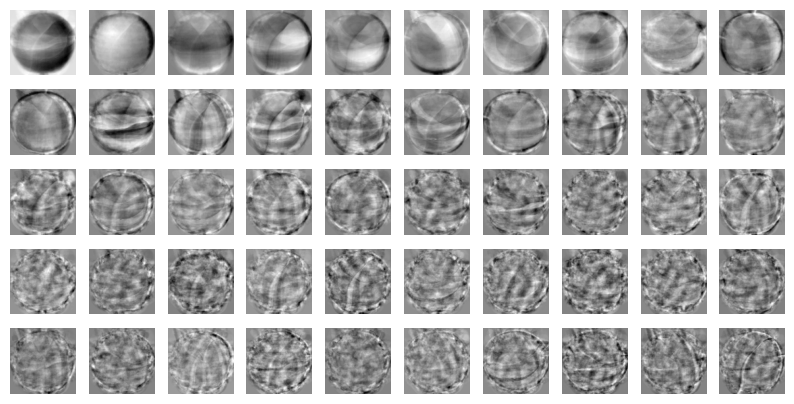

In [5]:
draw_fruits(pca.components_.reshape(-1,100,100))

이 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다.

원본 데이터를 주성분에 투영하여 특성을 10,000개에서 50개로 줄일 수 있다.

In [6]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


**원본 데이터 재구성**

특성이 10,000개에서 50개로 줄었지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터를 재구성할 수 있다.

분산은 데이터의 흩어짐 정도를 나타낸다. 데이터의 분산이 큰 방향은 원본 데이터의 변동성을 많이 포함하고 있는 방향이다. PCA는 이러한 변동성을 최대한 보존하는 방향으로 데이터를 투영하여 주요한 정보를 잃지 않고 차원을 줄인다.

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


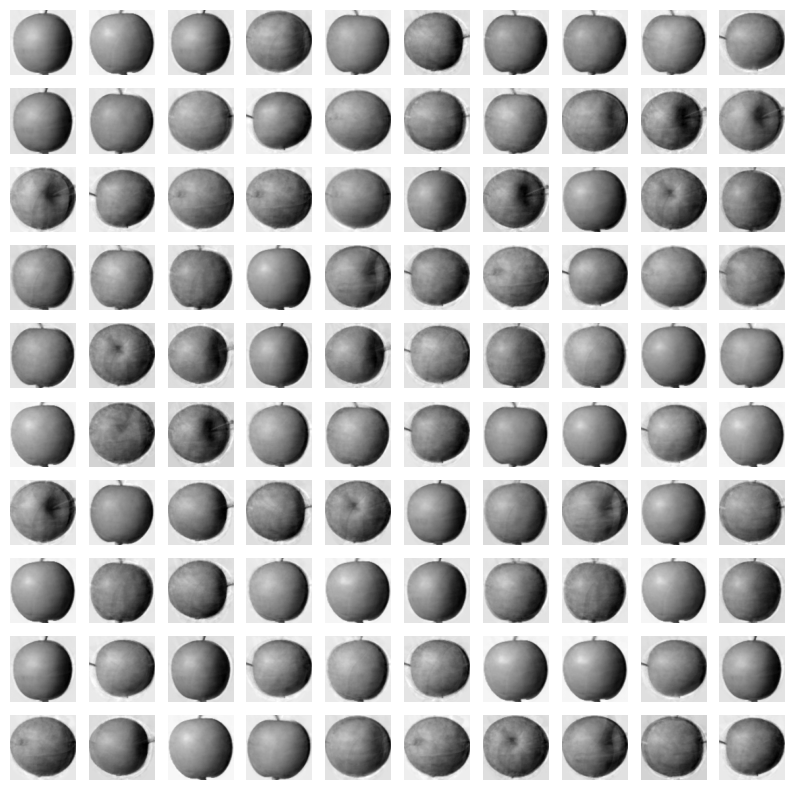

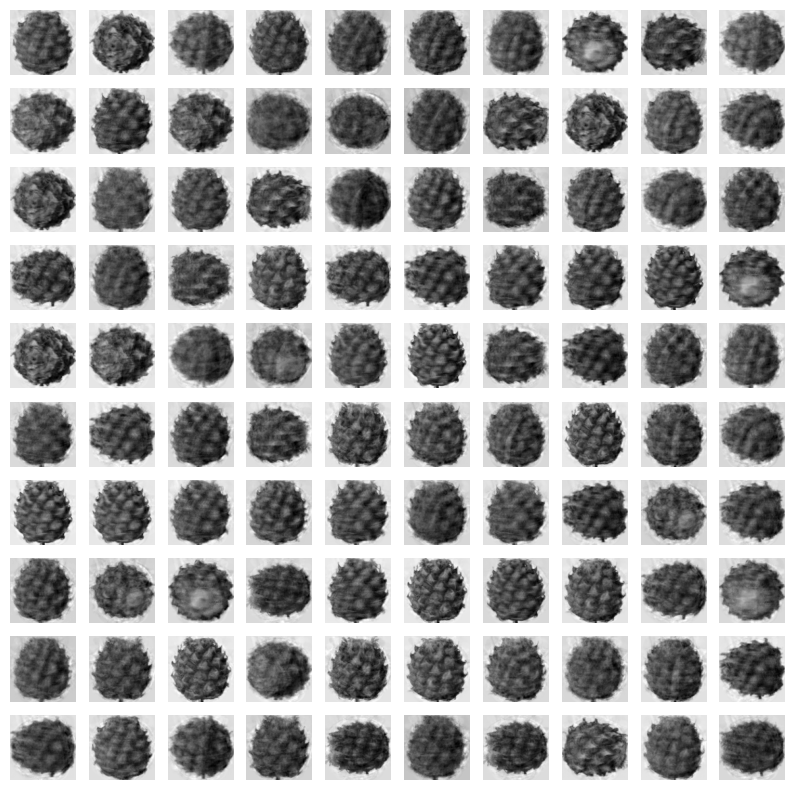

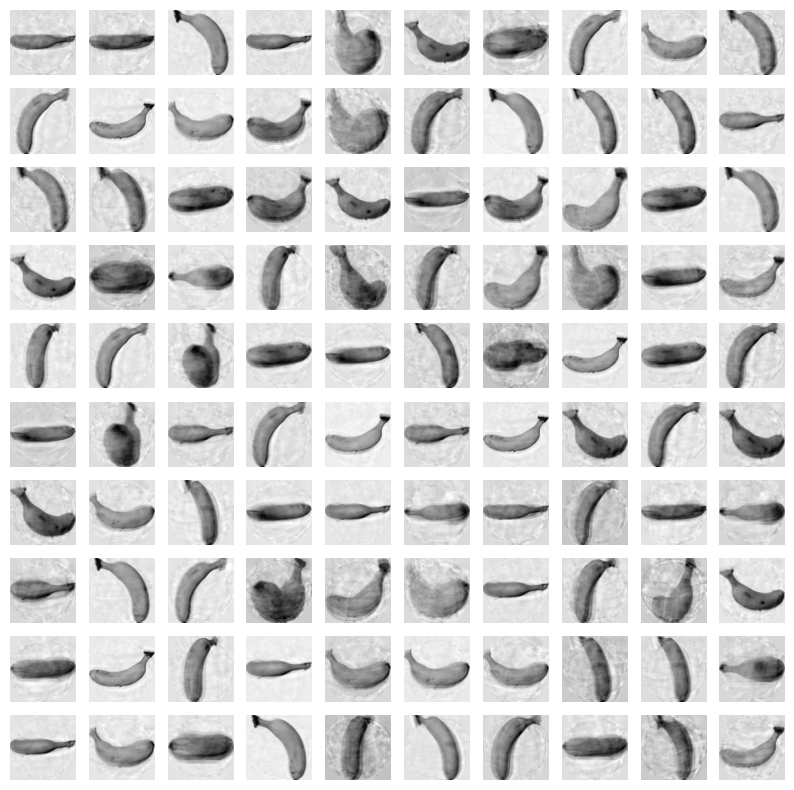

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

**설명된 분산**

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

PCA 클래스의 explained_variance_ratio에 각 주성분의 설명된 분산 비율이 기록되어 있다.

첫번째 주성분의 설명된 분산이 가장 크다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율을 얻는다.

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215174969771057


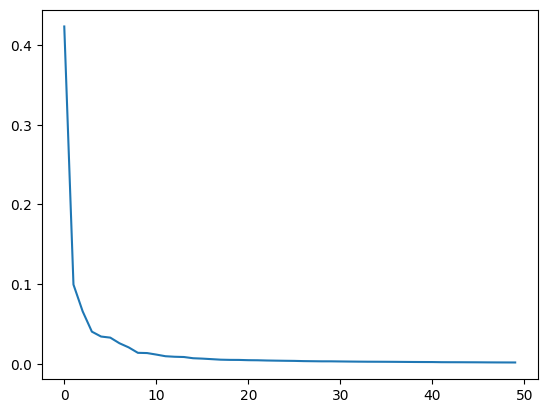

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()
# 처음 10개의 주성분이 대부분의 분산을 표현한다.

**다른 알고리즘과 함께 사용하기**

과일 사진을 분류해야 하므로 로지스틱 회귀 모델을 사용한다.

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target 지정

사과:0, 파인애플:1, 바나나:2

파이썬 리스트와 정수를 곱해 리스트 안의 원소를 정수만큼 반복한다.

In [13]:
target = np.array([0]*100+[1]*100+[2]*100)
# 0,1,2가 각각 100개씩

In [14]:
#원본 데이터
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.5098438262939453


In [15]:
#차원 축소 후
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.02109417915344238


정확도는 100%이고 훈련 시간이 20배 이상 감소했다.

앞에서는 n_components로 주성분의 개수를 지정했다. 대신 원하는 설명된 분산의 비율을 입력할 수 있다. pca 클래스가 지정된 비율에 도달할 때까지 자동으로 주성분을 찾도록 한다.

In [16]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [17]:
print(pca.n_components_) # 2개의 특성으로 원본 데이터에 있는 분산의 50%를 설명 가능함

2


In [18]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [19]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))
# 2개의 특성으로 99%의 정확도를 달성함

c:\anaconda\envs\weit_python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99
0.07269668579101562


c:\anaconda\envs\weit_python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state = 42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


fruits_pca로 찾은 cluster는 110, 99, 91개의 샘플을 포함하고 있다.

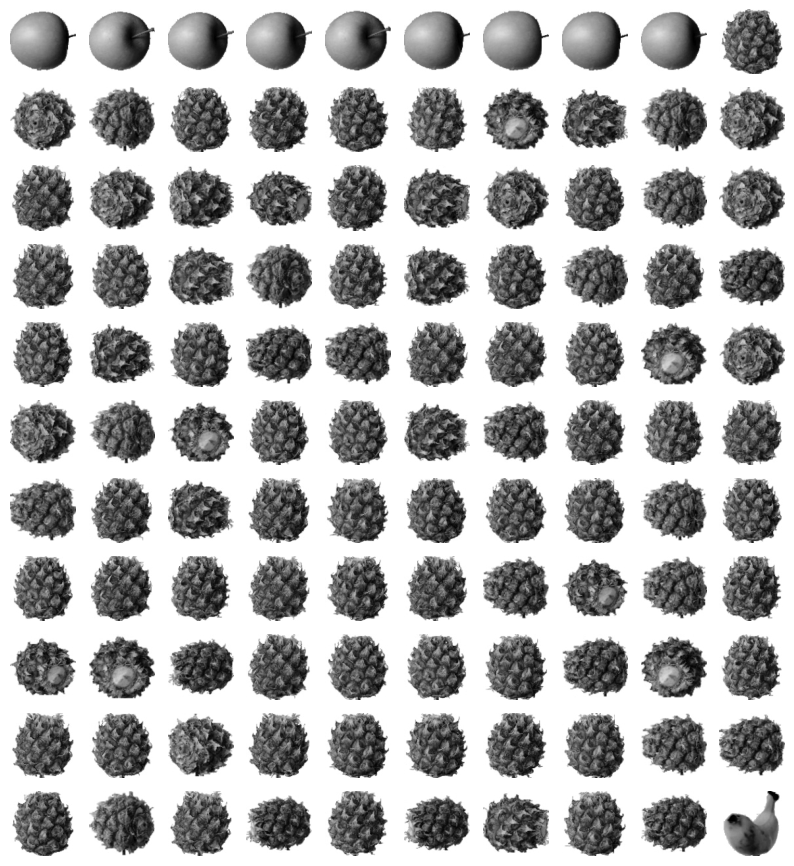

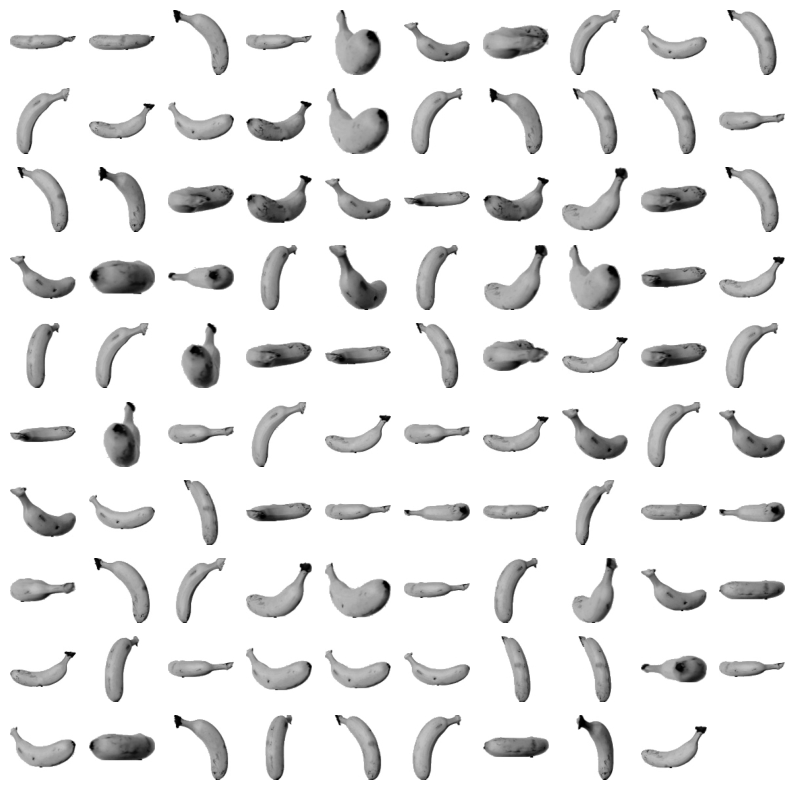

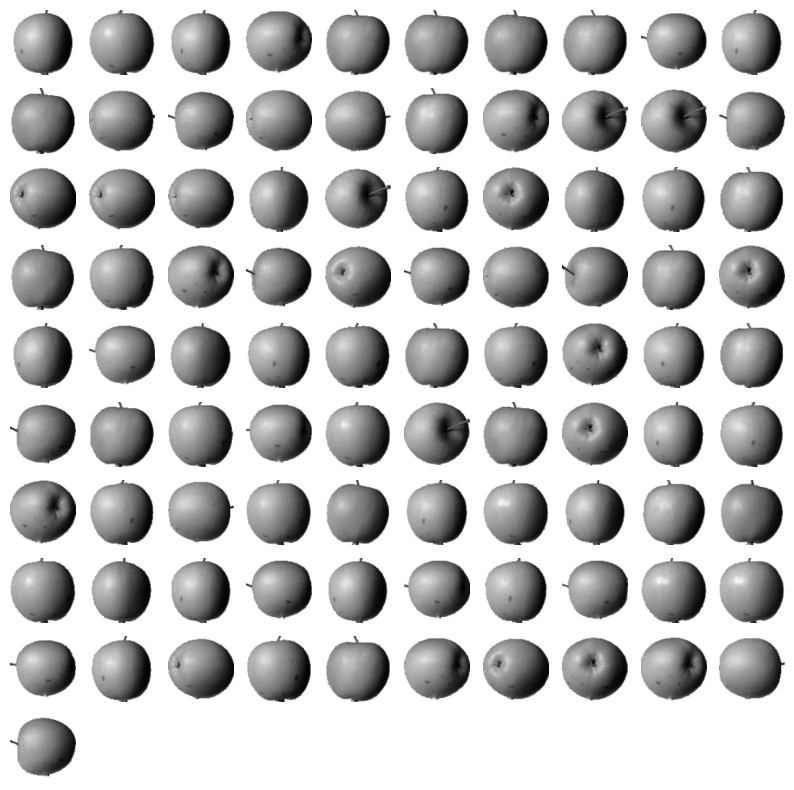

In [21]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

**시각화**

3개 이하로 차원을 줄이면 화면에 출력하기 편하다.

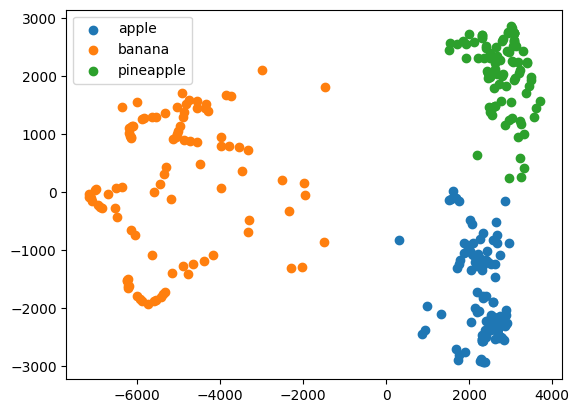

In [22]:
for label in range(0,3):
    data = fruits_pca[km.labels_==label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana','pineapple'])
plt.show()